# Golden Section Search

In [26]:
import numpy as np
import typing
from numpy import typing as nptyping
import scipy as sp
import scipy.optimize as op

In [27]:
def golden_section(f, boundary, maxiter=500, tol=1e-5):
    r = (-1 + np.sqrt(5)) / 2  # golden ratio
    a = boundary[0]  # lower bound
    b = boundary[1]  # upper bound

    for _ in range(maxiter):
        h = b - a
        if abs(h) < tol:
            return (a + b) / 2
        lower = b - r * h
        upper = a + r * h

        if f(lower) > f(upper):
            a = lower
        else:
            b = upper

    return (a + b) / 2

In [28]:
# Example of Golden Section Search
f = lambda x: np.exp(3 * x) + 5 * np.exp(-2 * x)
root = golden_section(f, [0, 3])
print(root)

0.2407956610080465


# Gradient Descent

In [41]:
from differentiation import gradient


def gradient_descent(f, x0, grad_f=None, step=0.01, maxiter=100000, tol=1e-6):
    x = x0
    for i in range(maxiter):
        if abs(f(x)) < tol:
            return x

        x -= step * gradient(f, x)
    print("Warning: Did not converge within given number of iteration.")
    return x

In [42]:
# Example of gradient descent
def my_func(x_vect: nptyping.ArrayLike):
    x = x_vect[0]
    y = x_vect[1]
    return x * y * np.exp(-(x**2 + y**2))


root = gradient_descent(my_func, [1.0, 2.0])
root2 = op.minimize(my_func, [1.0, 2.0])
print(root)
print(root2)

[1.36694029 3.17483194]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1965014368315786e-06
        x: [ 1.474e+00  3.625e+00]
      nit: 13
      jac: [-2.715e-06 -8.344e-06]
 hess_inv: [[ 4.534e+02  1.547e+03]
            [ 1.547e+03  5.290e+03]]
     nfev: 42
     njev: 14


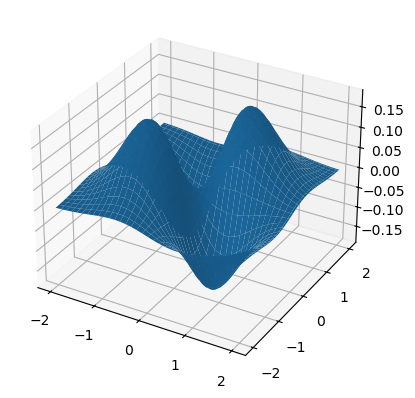

In [52]:
# Plot gradient descent
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 101)
y = np.linspace(-2, 2, 101)
xgrid, ygrid = np.meshgrid(x, y)


def my_func2(x, y):
    return x * y * np.exp(-(x**2 + y**2))


zgrid = my_func2(xgrid, ygrid)

fig = plt.figure()
ax = plt.axes(projection="3d", proj_type="persp")
ax.plot_surface(xgrid, ygrid, zgrid)

# Nelder-Mead Method